# Structure factor

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
b = 3.0
T = 10000
N = 100

**Trajectory and Output**

In [8]:
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))
for t in range(T):
    
    bx=np.random.uniform(-1,1,10*N)
    by=np.random.uniform(-1,1,10*N)
    bz=np.random.uniform(-1,1,10*N)
    normb=np.sqrt(bx**2+by**2+bz**2)
    
    idb=np.where(normb<=1)[0][0:N]
    bx=bx[idb]/normb[idb]
    by=by[idb]/normb[idb]
    bz=bz[idb]/normb[idb]
    
    vb=b*np.array([bx,by,bz])   
    x[t,1:]=np.cumsum(vb[0])
    y[t,1:]=np.cumsum(vb[1])

In [9]:
filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
with open(filename,'w') as f:
    for t in range(T):
        f.write('%d\n'%(N+1))
        f.write('t=%d\n'%t)
        for n in range(N+1):
            f.write('C %8.3f %8.3f %8.3f\n'%(x[t,n],y[t,n],z[t,n]))

In [11]:
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))
filename = 'simulation_FJC_b=3.0_N=100_T=10000.xyz'
with open(filename, 'r') as file:
    for t in range(T):
        file.readline()
        file.readline()
        for n in range(N+1):
            data = file.readline()
            x[t,n] = float(data.split()[1])
            y[t,n] = float(data.split()[2])
            z[t,n] = float(data.split()[3])    

In [14]:
d=np.zeros((N+1,N+1))


Text(0, 0.5, 'structure factor')

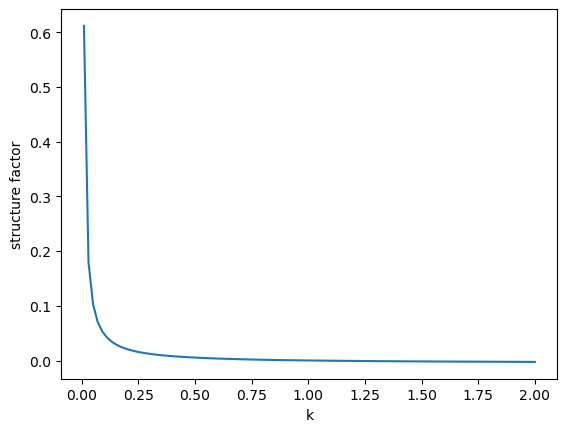

In [18]:
k_values = np.linspace(0.01,2.0,100)
SF = np.zeros_like(k_values)
for i, k in enumerate(k_values):
    term_sum = sum(np.sin(k * n * b) / (k * n * b) for n in range(1, N + 1))
    SF[i] = term_sum / N
plt.plot(k_values,SF)
plt.xlabel('k')
plt.ylabel('structure factor')